In [30]:
import h5py

# Open the HDF5 file
dir_path = "/proj/bhuyan24/fed-divergence/results/MOON_KL/CIFAR10/CNN/num_clients_50/"
h5_file =  dir_path + "/10/noise_level_0.2/0_dataset_CIFAR10_algorithm_MOON_KL_model_CNN_10_50_0.2_31_07_2024.h5"
with h5py.File(h5_file, 'r') as file:
    # List all groups
    print("Keys: %s" % file.keys())
    

Keys: <KeysViewHDF5 ['batch_size', 'exp_no', 'global_f1', 'global_precision', 'global_recall', 'global_rounds', 'global_test_accuracy', 'global_test_loss', 'global_train_accuracy', 'global_train_loss', 'local_f1', 'local_precision', 'local_recall', 'local_test_accuracy', 'local_test_loss', 'local_train_accuracy', 'local_train_loss', 'lr']>


In [42]:

import h5py # type: ignore
import numpy as np # type: ignore

# Define the directory paths and file names
directories = [
    "/proj/bhuyan24/fed-divergence/results/FedAvg/CIFAR10/CNN/num_clients_50/3/noise_level_0.8",
    "/proj/bhuyan24/fed-divergence/results/FedProx/CIFAR10/CNN/num_clients_50/3/noise_level_0.8",
    "/proj/bhuyan24/fed-divergence/results/MOON/CIFAR10/CNN/num_clients_50/3/noise_level_0.8",
    #"/proj/bhuyan24/fed-divergence/results/MOON_KL/CIFAR10/CNN/num_clients_50/3/noise_level_0.4",
    "/proj/bhuyan24/fed-divergence/results/MOON_L2/CIFAR10/CNN/num_clients_50/3/noise_level_0.8"
    # Add the other four directory paths here
]
file_names = [
    "0_dataset_CIFAR10_algorithm_FedAvg_model_CNN_3_50_0.8_31_07_2024.h5",
    "0_dataset_CIFAR10_algorithm_FedProx_model_CNN_3_50_0.8_31_07_2024.h5",
    "0_dataset_CIFAR10_algorithm_MOON_model_CNN_3_50_0.8_31_07_2024.h5",
    #"0_dataset_CIFAR10_algorithm_MOON_KL_model_CNN_3_50_0.4_31_07_2024.h5",
    "0_dataset_CIFAR10_algorithm_MOON_L2_model_CNN_3_50_0.8_31_07_2024.h5"
    
    # Add the other four file names here
]

# This will hold the global_f1 data from all files
global_f1_data = []
global_v_loss = []
global_tr_loss = []
global_test_accuracy_data = []

# Read each file
for dir_path, file_name in zip(directories, file_names):
    full_path = f"{dir_path}/{file_name}"
    with h5py.File(full_path, 'r') as file:
        # Extract the global_f1 data
        global_f1 = file['global_f1'][:]
        global_f1_data.append(global_f1)
        max_f1 = np.max(global_f1)
        print(f"{max_f1}")

        global_test_accuracy = file['global_test_accuracy'][:]
        global_test_accuracy_data.append(global_test_accuracy)
        #max_acc = np.max(global_test_accuracy)
        #print(f"{max_acc}")


        global_vl = file['global_test_loss'][:]
        global_v_loss.append(global_vl)
        global_trl = file['global_train_loss'][:]
        global_tr_loss.append(global_trl)


0.0776753565528374
0.07787348492713161
0.0778255309263701
0.07002422326975676


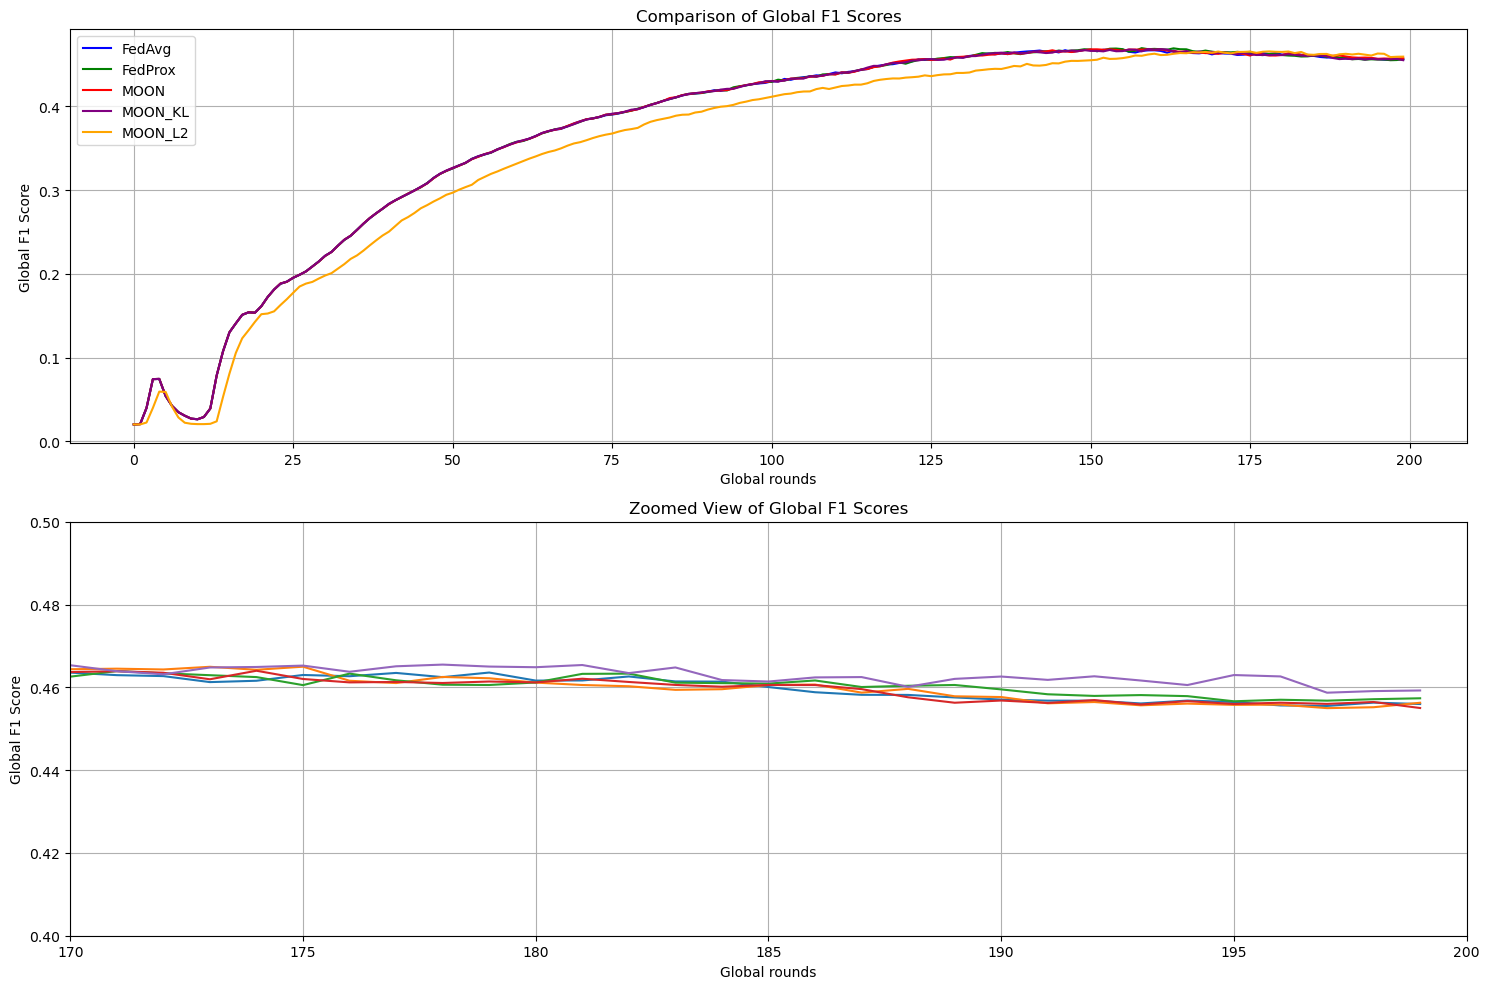

In [13]:

import matplotlib.pyplot as plt # type: ignore

# Your existing data loading code...

# Plotting
labels = ['FedAvg', 'FedProx', 'MOON', 'MOON_KL', 'MOON_L2']
colors = ['blue', 'green', 'red', 'purple', 'orange'] 

plt.figure(figsize=(15, 10))

# Main plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
for i, data in enumerate(global_f1_data):
    plt.plot(data, label=f'{labels[i]}', color=colors[i])

plt.title('Comparison of Global F1 Scores')
plt.xlabel('Global rounds')
plt.ylabel('Global F1 Score')
plt.legend()
plt.grid(True)

# Zoomed subplot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
zoom_range_x = [170, 200]  # Customize this range to focus on the interesting parts
zoom_range_y = [0.4, 0.5]  # Customize the y-axis range as needed
for i, data in enumerate(global_f1_data):
    plt.plot(data, label=f'{labels[i]}')

plt.xlim(zoom_range_x)
plt.ylim(zoom_range_y)
plt.title('Zoomed View of Global F1 Scores')
plt.xlabel('Global rounds')
plt.ylabel('Global F1 Score')
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

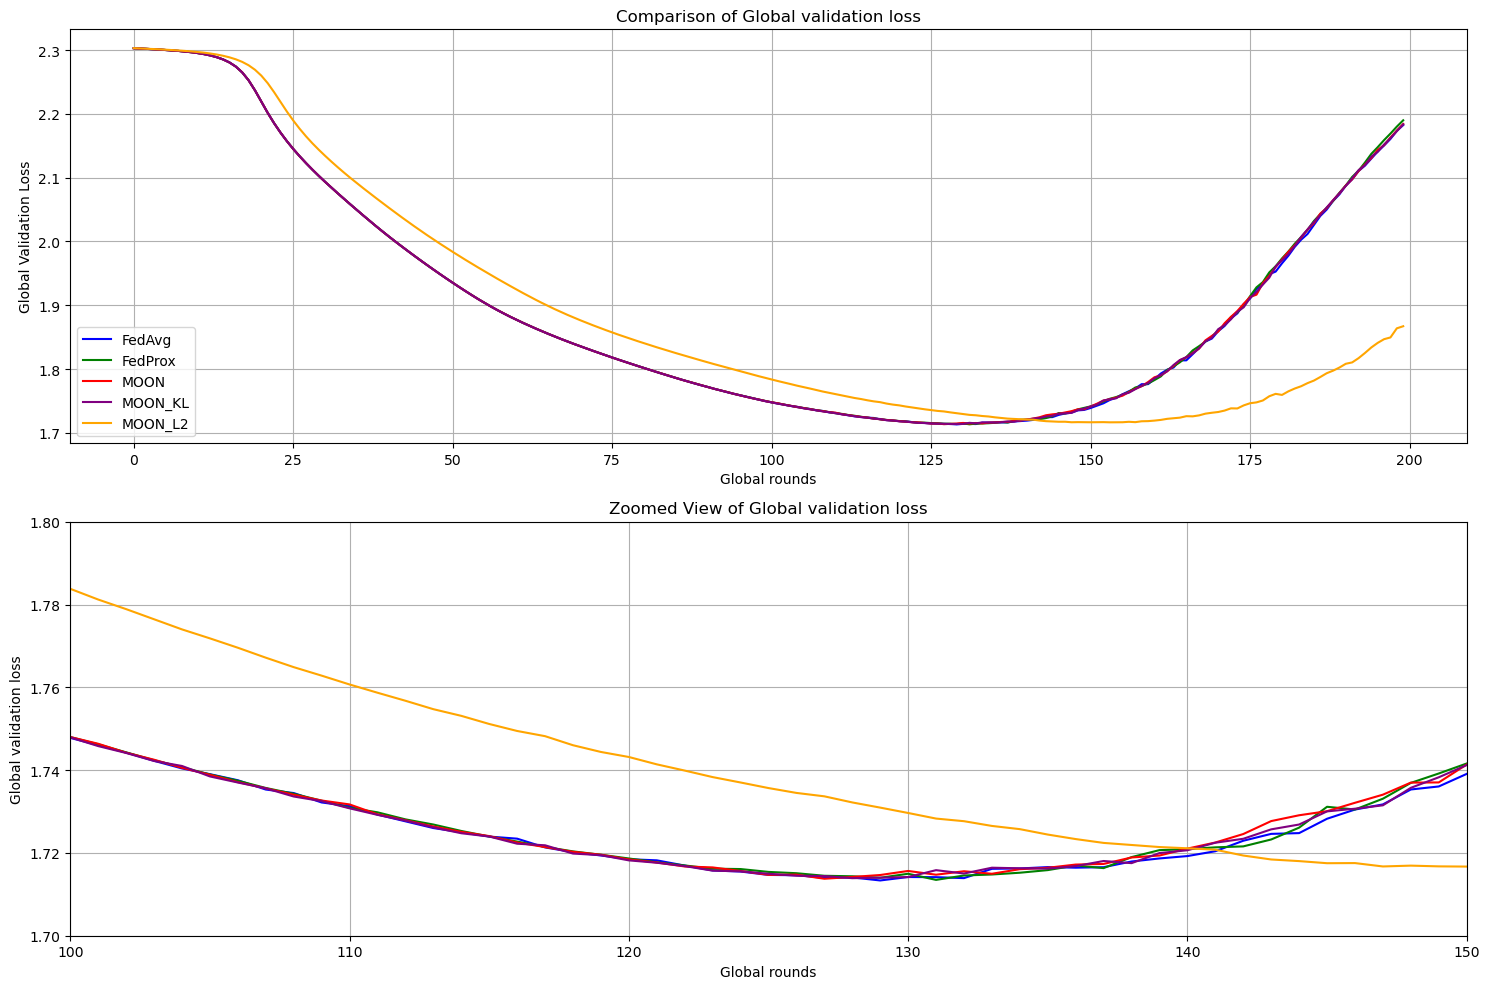

In [21]:
import matplotlib.pyplot as plt # type: ignore

# Your existing data loading code...

# Plotting
labels = ['FedAvg', 'FedProx', 'MOON', 'MOON_KL', 'MOON_L2']
colors = ['blue', 'green', 'red', 'purple', 'orange'] 

plt.figure(figsize=(15, 10))

# Main plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
for i, data in enumerate(global_v_loss):
    plt.plot(data, label=f'{labels[i]}', color=colors[i])

plt.title('Comparison of Global validation loss')
plt.xlabel('Global rounds')
plt.ylabel('Global Validation Loss')
plt.legend()
plt.grid(True)

# Zoomed subplot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
zoom_range_x = [100, 150]  # Customize this range to focus on the interesting parts
zoom_range_y = [1.7, 1.8]  # Customize the y-axis range as needed
for i, data in enumerate(global_v_loss):
    plt.plot(data, label=f'{labels[i]}', color=colors[i])

plt.xlim(zoom_range_x)
plt.ylim(zoom_range_y)
plt.title('Zoomed View of Global validation loss')
plt.xlabel('Global rounds')
plt.ylabel('Global validation loss')
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

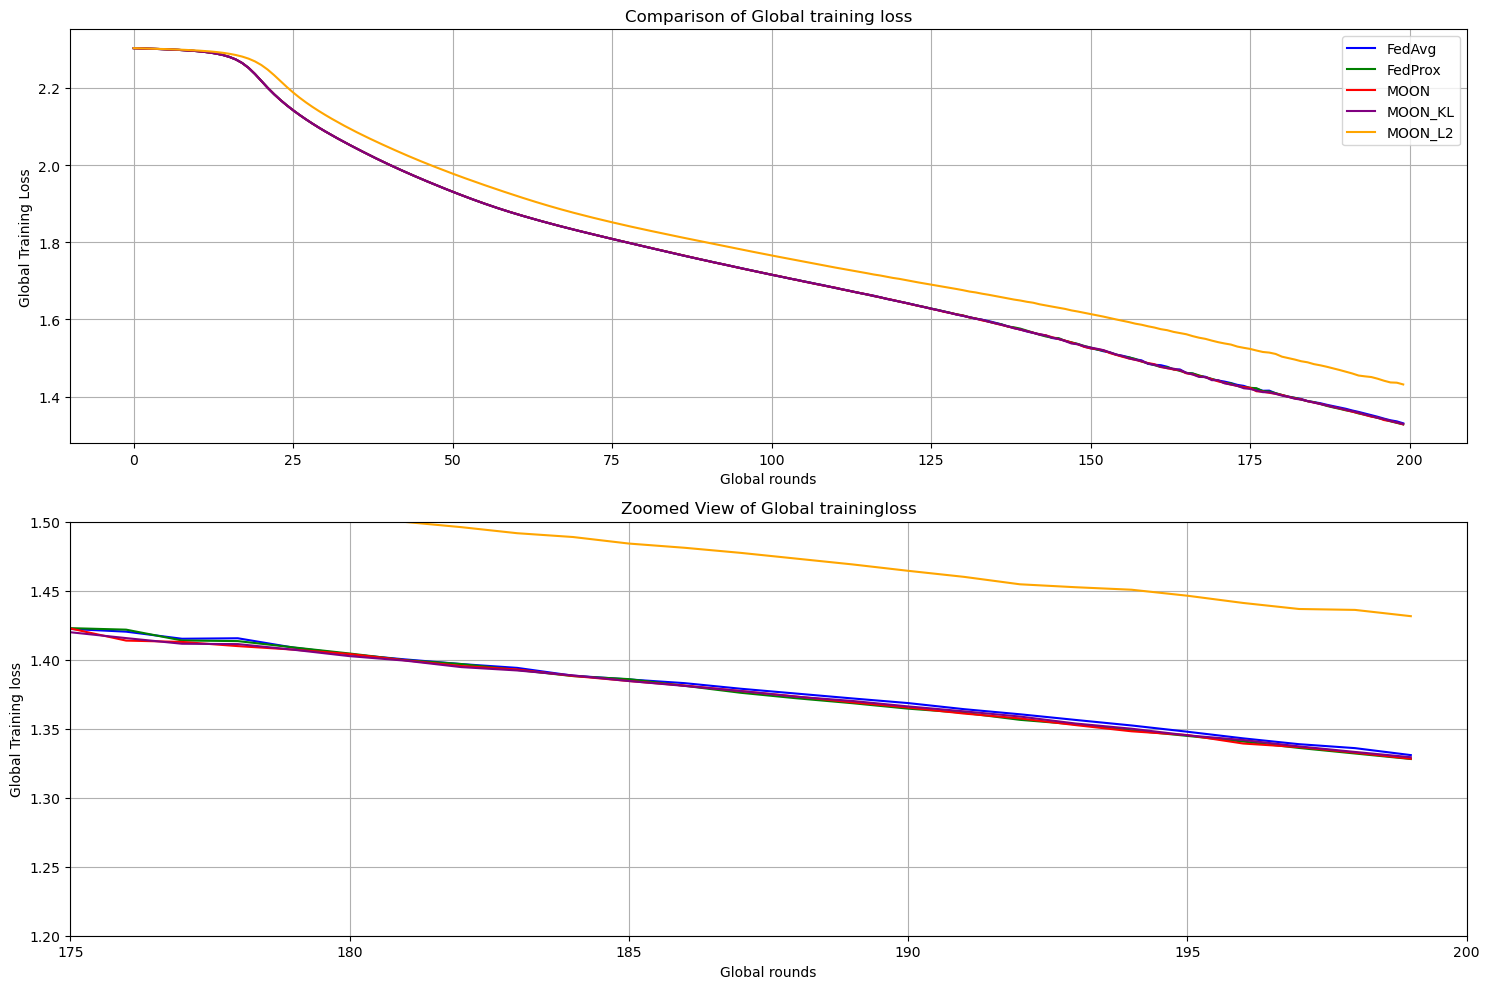

In [25]:
import matplotlib.pyplot as plt # type: ignore

# Your existing data loading code...

# Plotting
labels = ['FedAvg', 'FedProx', 'MOON', 'MOON_KL', 'MOON_L2']
colors = ['blue', 'green', 'red', 'purple', 'orange'] 

plt.figure(figsize=(15, 10))

# Main plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
for i, data in enumerate(global_tr_loss):
    plt.plot(data, label=f'{labels[i]}', color=colors[i])

plt.title('Comparison of Global training loss')
plt.xlabel('Global rounds')
plt.ylabel('Global Training Loss')
plt.legend()
plt.grid(True)

# Zoomed subplot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
zoom_range_x = [175, 200]  # Customize this range to focus on the interesting parts
zoom_range_y = [1.2, 1.5]  # Customize the y-axis range as needed
for i, data in enumerate(global_tr_loss):
    plt.plot(data, label=f'{labels[i]}', color=colors[i])

plt.xlim(zoom_range_x)
plt.ylim(zoom_range_y)
plt.title('Zoomed View of Global trainingloss')
plt.xlabel('Global rounds')
plt.ylabel('Global Training loss')
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()